Exercise 1: Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

Binomial probabilities for one release event (n=10, p=0.2):
P(X=0) = 0.10737
P(X=1) = 0.26844
P(X=2) = 0.30199
P(X=3) = 0.20133
P(X=4) = 0.08808
P(X=5) = 0.02642
P(X=6) = 0.00551
P(X=7) = 0.00079
P(X=8) = 0.00007
P(X=9) = 0.00000
P(X=10) = 0.00000


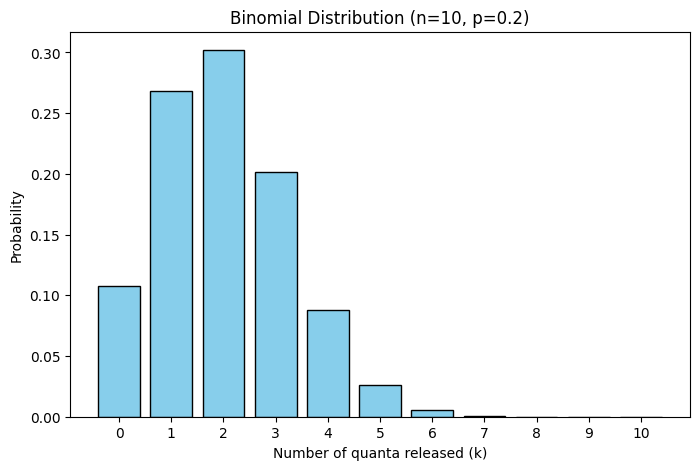

In [10]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Parameters
n, p = 10, 0.2   # 10 available quanta, each released with prob 0.2

# Possible number of quanta released
k_values = np.arange(0, n+1)

# Binomial probabilities
probs = st.binom.pmf(k_values, n, p)

# Show results
print("Binomial probabilities for one release event (n=10, p=0.2):")
for k, prob in zip(k_values, probs):
    print(f"P(X={k}) = {prob:.5f}")

# Plot
plt.figure(figsize=(8, 5))
plt.bar(k_values, probs, color="skyblue", edgecolor="black")
plt.xlabel("Number of quanta released (k)")
plt.ylabel("Probability")
plt.title("Binomial Distribution (n=10, p=0.2)")
plt.xticks(k_values)
plt.show()



Exercise 2: Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.

Likelihood at specific p values:
 p = 0.10  -->  L(p) = 1.595917e-05
 p = 0.70  -->  L(p) = 1.262023e-01

Grid results (p, likelihood, log-likelihood):
 p=0.10  L=1.595917e-05  logL=-11.045477
 p=0.20  L=2.015279e-03  logL=-6.206998
 p=0.30  L=2.318001e-02  logL=-3.764465
 p=0.40  L=9.182116e-02  logL=-2.387913
 p=0.50  L=1.832886e-01  logL=-1.696693
 p=0.60  L=2.065976e-01  logL=-1.576982
 p=0.70  L=1.262023e-01  logL=-2.069869
 p=0.80  L=3.224447e-02  logL=-3.434409
 p=0.90  L=1.292693e-03  logL=-6.651028
 p=1.00  L=0.000000e+00  logL=-inf

Grid MLE (decile grid): p_hat = 0.60 (grid max)
Analytical MLE: p_hat = k/n = 8/14 = 0.571429
L(p_hat_analytic) = 2.115389e-01  logL = -1.553346


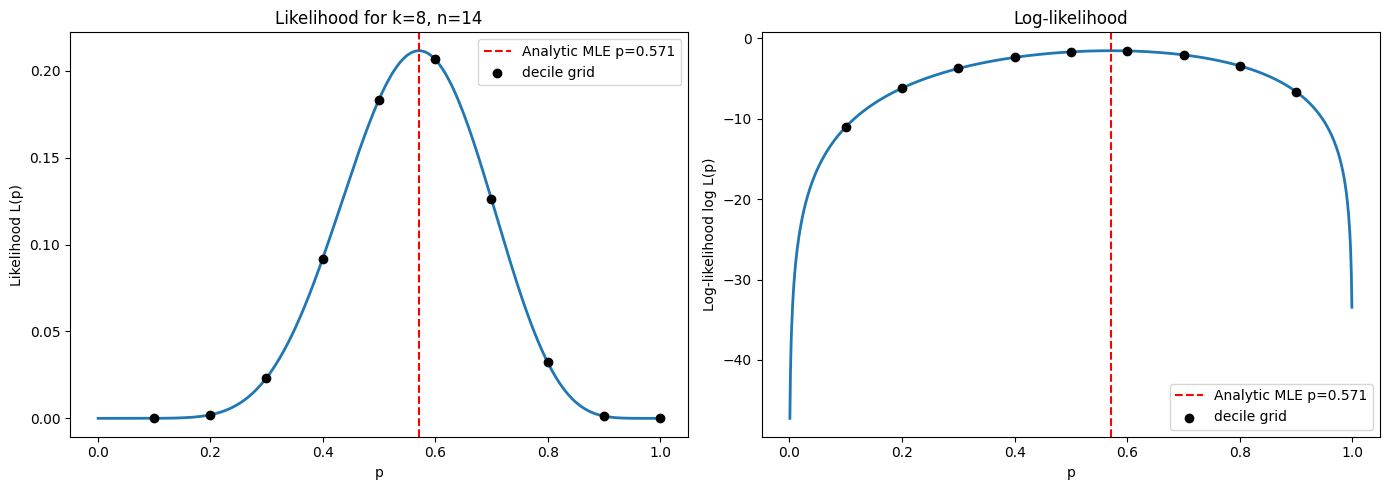

In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Data
n = 14
k = 8

# Specific p values requested
p_values_specific = [0.1, 0.7]

# Decile grid p = 0.1, 0.2, ..., 1.0
p_grid = np.linspace(0.1, 1.0, 10)

# Function: binomial likelihood for observing k successes (as function of p)
def binom_likelihood(k, n, p):
    return st.binom.pmf(k, n, p)

def binom_loglik(k, n, p):
    # use scipy's pmf and take log or use logpmf for numeric stability
    return st.binom.logpmf(k, n, p)

# Compute for specific p values
print("Likelihood at specific p values:")
for p in p_values_specific:
    L = binom_likelihood(k, n, p)
    print(f" p = {p:.2f}  -->  L(p) = {L:.6e}")

# Compute across the decile grid
likelihoods = np.array([binom_likelihood(k, n, p) for p in p_grid])
logliks = np.array([binom_loglik(k, n, p) for p in p_grid])

print("\nGrid results (p, likelihood, log-likelihood):")
for p, L, ll in zip(p_grid, likelihoods, logliks):
    print(f" p={p:.2f}  L={L:.6e}  logL={ll:.6f}")

# Grid-based MLE
idx_max = np.argmax(likelihoods)
p_hat_grid = p_grid[idx_max]
print(f"\nGrid MLE (decile grid): p_hat = {p_hat_grid:.2f} (grid max)")

# Analytical MLE for binomial with a single observation k ~ Bin(n,p)
p_hat_analytic = k / n
print(f"Analytical MLE: p_hat = k/n = {k}/{n} = {p_hat_analytic:.6f}")

# For completeness, compute likelihood at analytic MLE
L_at_analytic = binom_likelihood(k, n, p_hat_analytic)
print(f"L(p_hat_analytic) = {L_at_analytic:.6e}  logL = {binom_loglik(k,n,p_hat_analytic):.6f}")

# Plot likelihood and log-likelihood across a fine grid for visualization
p_fine = np.linspace(0.001, 0.999, 1000)
lik_fine = np.array([binom_likelihood(k, n, p) for p in p_fine])
loglik_fine = np.array([binom_loglik(k, n, p) for p in p_fine])

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(p_fine, lik_fine, lw=2)
axes[0].axvline(p_hat_analytic, color='red', linestyle='--', label=f'Analytic MLE p={p_hat_analytic:.3f}')
axes[0].scatter(p_grid, likelihoods, color='black', zorder=5, label='decile grid')
axes[0].set_xlabel('p')
axes[0].set_ylabel('Likelihood L(p)')
axes[0].set_title(f'Likelihood for k={k}, n={n}')
axes[0].legend()

axes[1].plot(p_fine, loglik_fine, lw=2)
axes[1].axvline(p_hat_analytic, color='red', linestyle='--', label=f'Analytic MLE p={p_hat_analytic:.3f}')
axes[1].scatter(p_grid, logliks, color='black', zorder=5, label='decile grid')
axes[1].set_xlabel('p')
axes[1].set_ylabel('Log-likelihood log L(p)')
axes[1].set_title('Log-likelihood')
axes[1].legend()

plt.tight_layout()
plt.show()


The most probable value of release probability is 0.57 (analytical maximum likelihood estimate), or the 0.60 decile.

Exercise 3: Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

Grid results (p, likelihood, log-likelihood):
 p=0.10  L=1.237819e-07  logL=-15.904745
 p=0.20  L=1.732843e-04  logL=-8.660577
 p=0.30  L=4.550575e-03  logL=-5.392502
 p=0.40  L=1.897003e-02  logL=-3.964895
 p=0.50  L=2.239647e-02  logL=-3.798852
 p=0.60  L=8.431125e-03  logL=-4.775825
 p=0.70  L=8.358200e-04  logL=-7.087097
 p=0.80  L=1.083027e-05  logL=-11.433166
 p=0.90  L=1.528171e-09  logL=-20.299194
 p=1.00  L=0.000000e+00  logL=-inf

Grid MLE (deciles): p_hat ≈ 0.50
Analytical MLE: p_hat = 13/28 = 0.464286


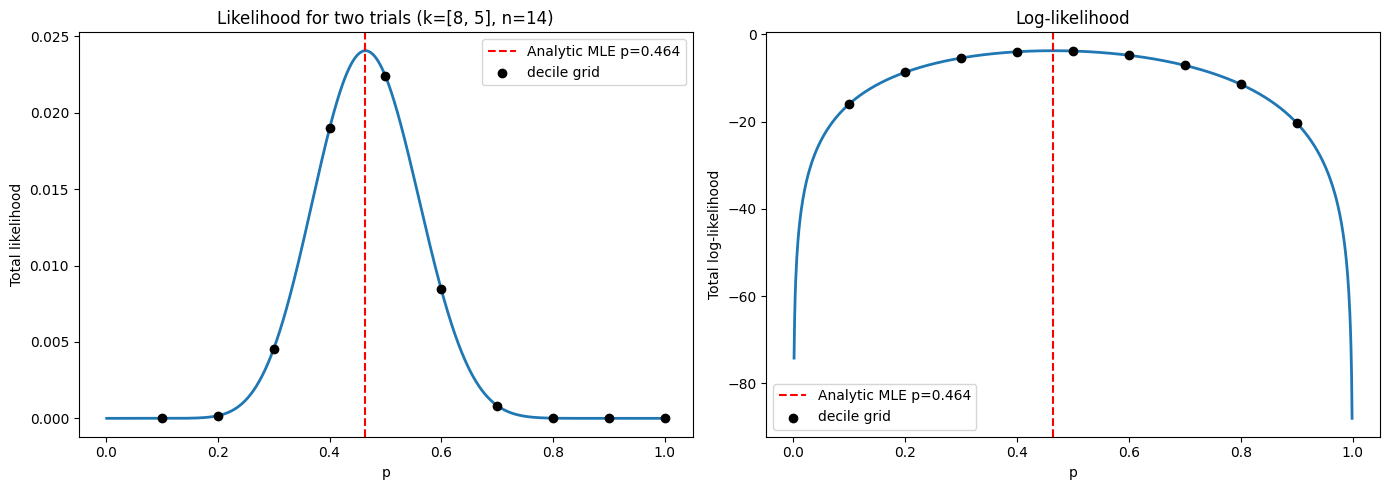

In [12]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Data
n = 14
observations = [8, 5]  # two independent measurements

# Grid of probabilities (deciles first)
p_grid = np.linspace(0.1, 1.0, 10)

# Functions
def total_likelihood(obs, n, p):
    L = 1.0
    for k in obs:
        L *= st.binom.pmf(k, n, p)
    return L

def total_loglikelihood(obs, n, p):
    ll = 0.0
    for k in obs:
        ll += st.binom.logpmf(k, n, p)
    return ll

# Compute for decile grid
likelihoods = np.array([total_likelihood(observations, n, p) for p in p_grid])
logliks = np.array([total_loglikelihood(observations, n, p) for p in p_grid])

print("Grid results (p, likelihood, log-likelihood):")
for p, L, ll in zip(p_grid, likelihoods, logliks):
    print(f" p={p:.2f}  L={L:.6e}  logL={ll:.6f}")

# Find grid MLE
p_hat_grid = p_grid[np.argmax(likelihoods)]
print(f"\nGrid MLE (deciles): p_hat ≈ {p_hat_grid:.2f}")

# Analytical MLE: average across both trials = total successes / total attempts
k_total = sum(observations)
n_total = n * len(observations)
p_hat_analytic = k_total / n_total
print(f"Analytical MLE: p_hat = {k_total}/{n_total} = {p_hat_analytic:.6f}")

# Plot likelihood and log-likelihood with finer grid
p_fine = np.linspace(0.001, 0.999, 1000)
lik_fine = [total_likelihood(observations, n, p) for p in p_fine]
loglik_fine = [total_loglikelihood(observations, n, p) for p in p_fine]

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(p_fine, lik_fine, lw=2)
axes[0].axvline(p_hat_analytic, color='red', linestyle='--', label=f'Analytic MLE p={p_hat_analytic:.3f}')
axes[0].scatter(p_grid, likelihoods, color='black', zorder=5, label='decile grid')
axes[0].set_xlabel('p')
axes[0].set_ylabel('Total likelihood')
axes[0].set_title(f'Likelihood for two trials (k={observations}, n={n})')
axes[0].legend()

axes[1].plot(p_fine, loglik_fine, lw=2)
axes[1].axvline(p_hat_analytic, color='red', linestyle='--', label=f'Analytic MLE p={p_hat_analytic:.3f}')
axes[1].scatter(p_grid, logliks, color='black', zorder=5, label='decile grid')
axes[1].set_xlabel('p')
axes[1].set_ylabel('Total log-likelihood')
axes[1].set_title('Log-likelihood')
axes[1].legend()

plt.tight_layout()
plt.show()


likelihood and log-likelihood at 𝑝=0.1 for the two measurements (8 and 5)

In [14]:
import scipy.stats as st

n = 14
observations = [8, 5]
p = 0.1

likelihood = 1
for k in observations:
    likelihood *= st.binom.pmf(k, n, p)

log_likelihood = sum(st.binom.logpmf(k, n, p) for k in observations)

print(f"Likelihood at p={p}: {likelihood:.6e}")
print(f"Log-likelihood at p={p}: {log_likelihood:.6f}")


Likelihood at p=0.1: 1.237819e-07
Log-likelihood at p=0.1: -15.904745


Exercise 4: What is the most likely value of p (which we typically refer to asc"p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

Total experiments = 107
Each trial had n = 14 quanta available

Analytic MLE: p_hat (most likely value of p) = 0.435915
Grid MLE (0.01 resolution): p_hat = 0.44
Optimizer MLE: p_hat = 0.435914

Bootstrap 95% CI: [0.4112, 0.4613]
Wald 95% CI: [0.4108, 0.4610]


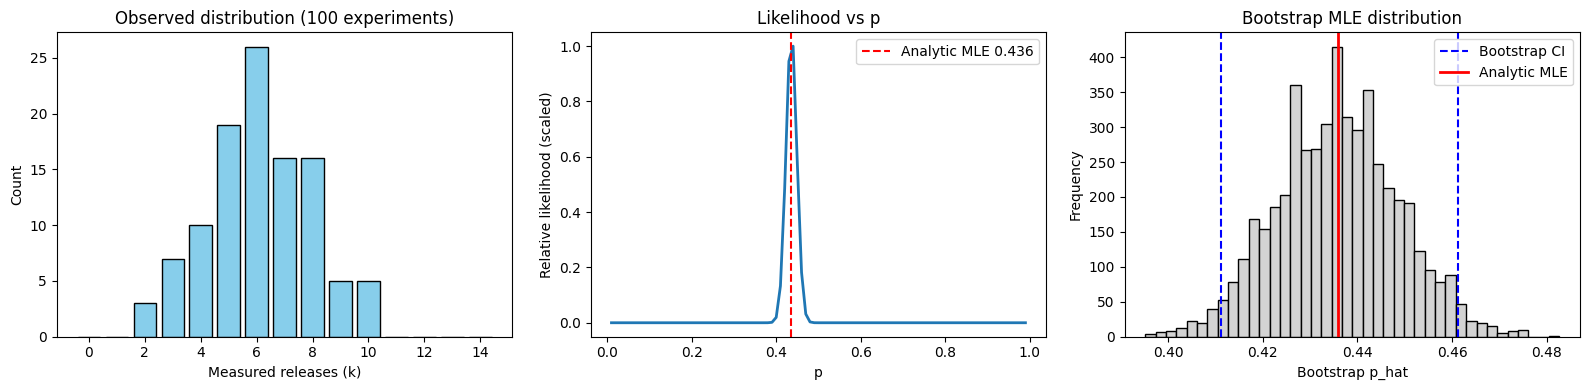

In [16]:
import numpy as np
import scipy.stats as st
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# -----------------------
# Data from your table
# -----------------------
measured_releases = np.arange(0, 15)  # 0..14
counts_obs = np.array([0,0,3,7,10,19,26,16,16,5,5,0,0,0,0])  # given counts
num_experiments = counts_obs.sum()
n_per_trial = 14

print(f"Total experiments = {num_experiments}")
print(f"Each trial had n = {n_per_trial} quanta available")

# Expand into a list of observed releases per experiment
observed = np.repeat(measured_releases, counts_obs)

# -----------------------
# Analytic MLE
# -----------------------
total_successes = observed.sum()
total_trials = num_experiments * n_per_trial
p_hat_analytic = total_successes / total_trials
print(f"\nAnalytic MLE: p_hat (most likely value of p) = {p_hat_analytic:.6f}")

# -----------------------
# Grid search MLE
# -----------------------
p_grid = np.arange(0.01, 1.0, 0.01)

def total_log_likelihood(p, obs, n):
    if p <= 0 or p >= 1:
        return -np.inf
    return np.sum(st.binom.logpmf(obs, n, p))

grid_loglik = np.array([total_log_likelihood(p, observed, n_per_trial) for p in p_grid])
p_hat_grid = p_grid[np.argmax(grid_loglik)]
print(f"Grid MLE (0.01 resolution): p_hat = {p_hat_grid:.2f}")

# -----------------------
# Continuous optimization
# -----------------------
res = minimize_scalar(lambda p: -total_log_likelihood(p, observed, n_per_trial),
                      bounds=(1e-9, 1-1e-9), method='bounded')
p_hat_opt = res.x
print(f"Optimizer MLE: p_hat = {p_hat_opt:.6f}")

# -----------------------
# Bootstrap CI
# -----------------------
rng = np.random.default_rng(123)
n_boot = 5000
boot_phats = np.empty(n_boot)
for i in range(n_boot):
    boot_sample = rng.choice(observed, size=num_experiments, replace=True)
    boot_phats[i] = boot_sample.sum() / (n_per_trial * num_experiments)

ci_lower, ci_upper = np.percentile(boot_phats, [2.5, 97.5])
print(f"\nBootstrap 95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

# -----------------------
# Wald CI (normal approx)
# -----------------------
se_hat = np.sqrt(p_hat_analytic * (1 - p_hat_analytic) / total_trials)
z = st.norm.ppf(0.975)
wald_lower = p_hat_analytic - z * se_hat
wald_upper = p_hat_analytic + z * se_hat
print(f"Wald 95% CI: [{wald_lower:.4f}, {wald_upper:.4f}]")

# -----------------------
# Plots
# -----------------------
fig, axes = plt.subplots(1, 3, figsize=(16,4))

# Histogram of observed data
axes[0].bar(measured_releases, counts_obs, color="skyblue", edgecolor="black")
axes[0].set_xlabel("Measured releases (k)")
axes[0].set_ylabel("Count")
axes[0].set_title("Observed distribution (100 experiments)")

# Likelihood curve
likelihoods_grid = np.exp(grid_loglik - np.max(grid_loglik))
axes[1].plot(p_grid, likelihoods_grid, lw=2)
axes[1].axvline(p_hat_analytic, color='red', linestyle='--', label=f'Analytic MLE {p_hat_analytic:.3f}')
axes[1].set_xlabel("p")
axes[1].set_ylabel("Relative likelihood (scaled)")
axes[1].legend()
axes[1].set_title("Likelihood vs p")

# Bootstrap distribution
axes[2].hist(boot_phats, bins=40, color="lightgray", edgecolor="black")
axes[2].axvline(ci_lower, color='blue', linestyle='--', label="Bootstrap CI")
axes[2].axvline(ci_upper, color='blue', linestyle='--')
axes[2].axvline(p_hat_analytic, color='red', lw=2, label="Analytic MLE")
axes[2].set_xlabel("Bootstrap p_hat")
axes[2].set_ylabel("Frequency")
axes[2].legend()
axes[2].set_title("Bootstrap MLE distribution")

plt.tight_layout()
plt.show()



Exercise 5: Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute p hat. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [23]:
import numpy as np
from scipy.stats import binom, chisquare

# Given values
k = 7
counts_obs = 5000
n = 14
p_null = 0.3

# Compute p-hat (MLE)
total_successes = k * counts_obs
total_trials = n * counts_obs
p_hat = total_successes / total_trials
print(f"p-hat = {p_hat:.3f}")

# Build observed counts array (only k=7 had data)
measured_releases = np.arange(0, 15)
counts_array = np.zeros_like(measured_releases, dtype=int)
counts_array[k] = counts_obs

# Expected counts under H0
N = counts_obs  # total number of trials
expected_probs = binom.pmf(measured_releases, n, p_null)
expected_counts = N * expected_probs

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=counts_array, f_exp=expected_counts)
print(f"Chi-square statistic = {chi2_stat:.2f}")
print(f"p-value = {p_value:.2e}")


p-hat = 0.500
Chi-square statistic = 75888.66
p-value = 0.00e+00


Since the p-value is much less than 0.05, we can reject the null hypothesis. Temperature likely does have an effect.